# EDA of RESUME classification

In [2]:
#1. Import Library
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = "C:\\Users\\govin\\Downloads\\Resumes-20220812T140008Z-001 (1) (1)"
doc_file = []
pdf_file = []
docx_file = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)  # Corrected line
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [4]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52


In [5]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


In [6]:
#2.1 Type of File Format
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

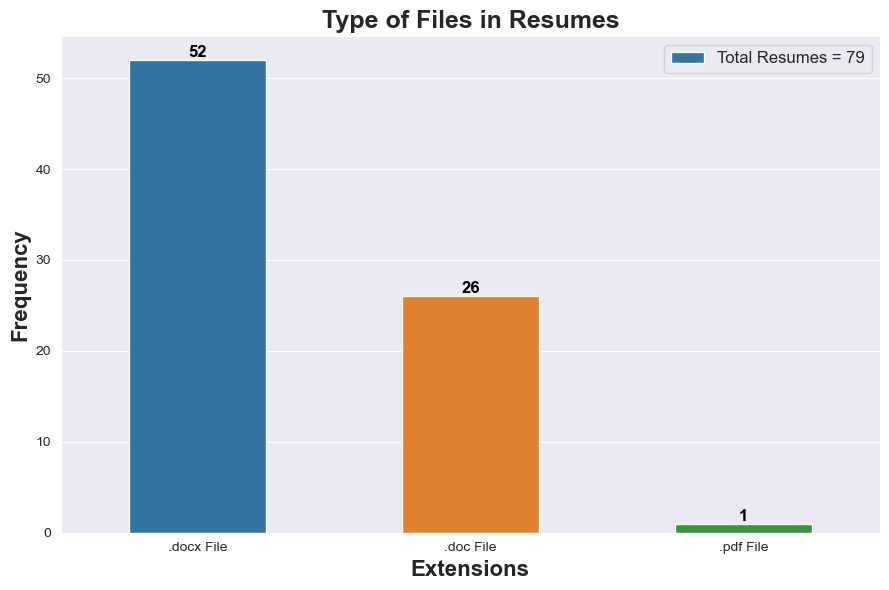

In [7]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('C:\\Users\\govin\\NLP project\File_Type_Bar', dpi = 500)

In [8]:
os.getcwd() #to get the current working directory.

'C:\\Users\\govin\\NLP project'

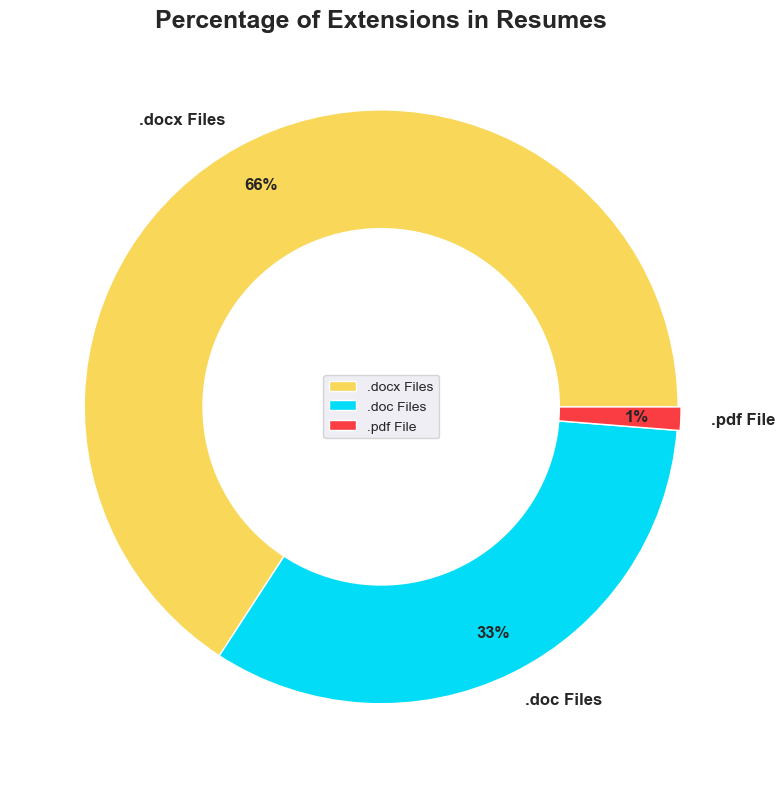

In [9]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85, 
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('C:\\Users\\govin\\NLP project\Per_File_Pai', dpi = 500)

# 3. Extract Resumes by Profile Category

In [10]:
#3. Extract Resumes by Profile Category
file_path = "C:\\Users\\govin\\Downloads\\Resumes new"
file_name = []
profile   = []
            
for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [11]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,people soft,Peoplesoft Admin_AnubhavSingh.docx
1,people soft,Peoplesoft Admin_G Ananda Rayudu.docx
2,people soft,Peoplesoft Admin_Gangareddy.docx
3,people soft,Peoplesoft Admin_Murali.docx
4,people soft,Peoplesoft Admin_Priyanka Ramadoss.docx
...,...,...
74,work day,Sri Krishna S_Hexaware.docx
75,work day,Srikanth-Hexaware.docx
76,work day,SSKumar_Hexaware.docx
77,work day,Venkateswarlu B_Hexaware.docx


In [12]:
resume_data.Profile.value_counts().index

Index(['react', 'work day', 'people soft', 'sql developer'], dtype='object')

In [13]:
resume_data.Profile.value_counts()

react            24
work day         21
people soft      20
sql developer    14
Name: Profile, dtype: int64

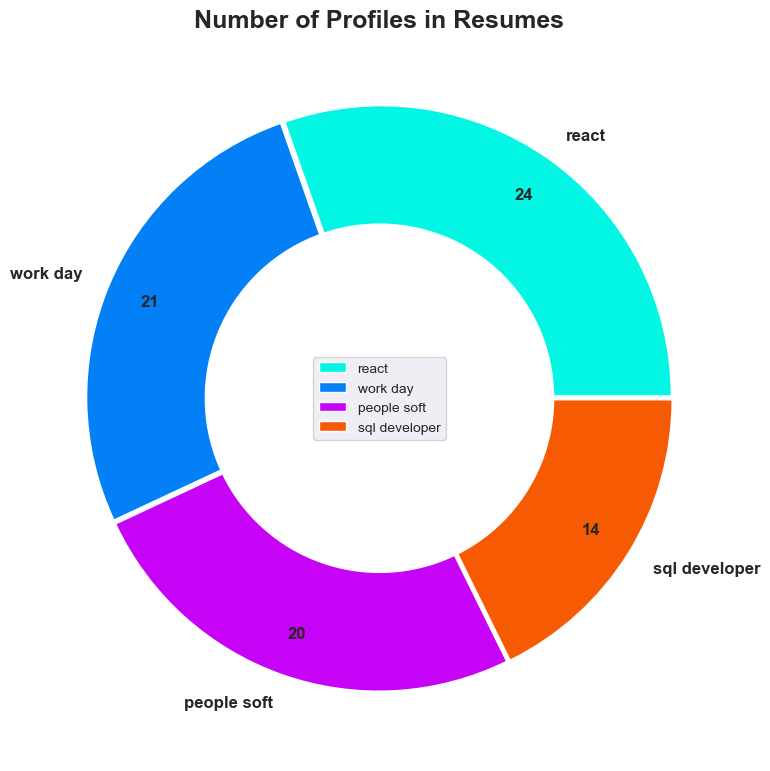

In [14]:
#3.1 Number of Total Resumes
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('C:\\Users\\govin\\NLP project/No_Resume_Pai', dpi = 500)

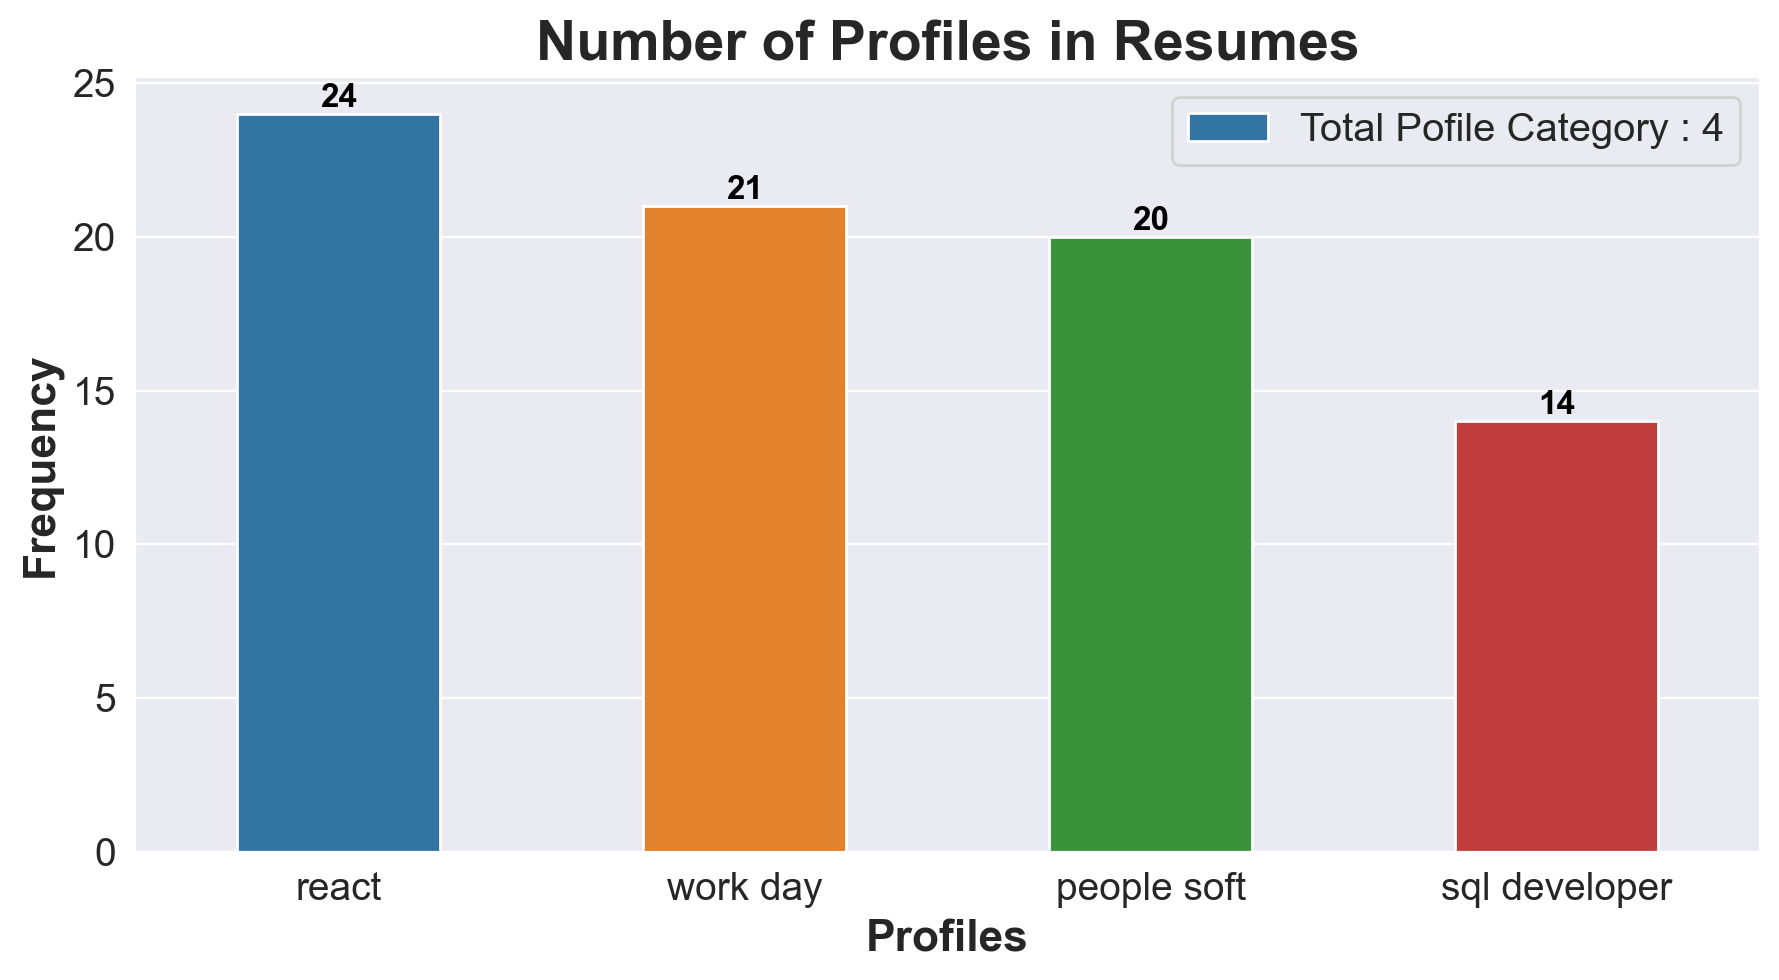

In [15]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= resume_data.Profile.value_counts().index, y= resume_data.Profile.value_counts(), width=0.5,
                 data= resume_data, ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Profile.unique())))

axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('C:\\Users\\govin\\NLP project/No_Resume_Bar', dpi = 500)

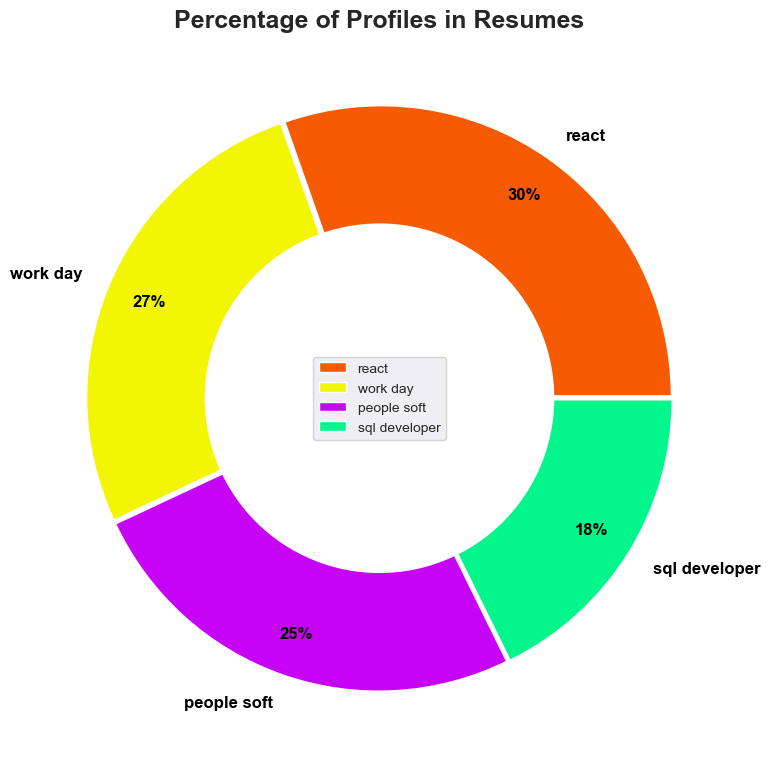

In [16]:
#Percentage of Profiles Category
fig = plt.figure(figsize=(8,8),dpi=100) 

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode, 
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('C:\\Users\\govin\\NLP project/Per_Cat_Pai', dpi = 500)

# 4. Reading a Resume File

In [17]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None
 
print(extract_text_from_docx("C:\\Users\\govin\\Downloads\\Resumes new\\sql developer\\Tatikonda Kiran Kumar.docx"))

Tatikonda Kiran Kumar.







  Career objective

 

A rewarding opportunity in a growth-oriented company, this gives me scope to apply my knowledge and become an active member of a team to work. I am seeking responsible position as to use my diverse skills, experience and advanced technical knowledge to develop innovative solutions. 



  Experience Summary



I.T. Professional with 3.2 years of total experience in MICROSOFT SQL SERVER Development with a talent for analyzing problems, developing and simplifying procedures and finding innovative solutions.

Experience in writing joins and set operators in order to pull data from multiple tables and combines data from multiple select queries results.s

Good knowledge in creating constraints on tables.

Hands on experience in Sub queries in order to store temporary result set of select queries.

Good knowledge on CTE (Common table expression) and Recursive CTE.

Experience In using system functions (aggregate functions, date functions, s

# 5. Data Exploration

In [18]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu ananda rayudu profile summary ye...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,srikanth workday hcm consultant seeking suitab...
76,Workday,workday hcm fcm name kumar role workday consul...
77,Workday,venkateswarlu workday consultant professional ...


# 5.1 N-grams
N-grams analyses are often used to see which words often show up together.

In [19]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:30]

[WordList(['ananda']),
 WordList(['rayudu']),
 WordList(['ananda']),
 WordList(['rayudu']),
 WordList(['profile']),
 WordList(['summary']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['implementing']),
 WordList(['upgrading']),
 WordList(['supporting']),
 WordList(['peoplesoft']),
 WordList(['database']),
 WordList(['administration']),
 WordList(['including']),
 WordList(['human']),
 WordList(['capital']),
 WordList(['management']),
 WordList(['hcm']),
 WordList(['financials']),
 WordList(['campus']),
 WordList(['solutions']),
 WordList(['portal']),
 WordList(['ihub']),
 WordList(['expertise']),
 WordList(['installation']),
 WordList(['configuration']),
 WordList(['setup']),
 WordList(['security']),
 WordList(['management'])]

In [20]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['ananda', 'rayudu']),
 WordList(['rayudu', 'ananda']),
 WordList(['ananda', 'rayudu']),
 WordList(['rayudu', 'profile']),
 WordList(['profile', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'implementing']),
 WordList(['implementing', 'upgrading']),
 WordList(['upgrading', 'supporting']),
 WordList(['supporting', 'peoplesoft']),
 WordList(['peoplesoft', 'database']),
 WordList(['database', 'administration']),
 WordList(['administration', 'including']),
 WordList(['including', 'human']),
 WordList(['human', 'capital']),
 WordList(['capital', 'management']),
 WordList(['management', 'hcm']),
 WordList(['hcm', 'financials']),
 WordList(['financials', 'campus'])]

In [21]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['ananda', 'rayudu', 'ananda']),
 WordList(['rayudu', 'ananda', 'rayudu']),
 WordList(['ananda', 'rayudu', 'profile']),
 WordList(['rayudu', 'profile', 'summary']),
 WordList(['profile', 'summary', 'years']),
 WordList(['summary', 'years', 'experience']),
 WordList(['years', 'experience', 'implementing']),
 WordList(['experience', 'implementing', 'upgrading']),
 WordList(['implementing', 'upgrading', 'supporting']),
 WordList(['upgrading', 'supporting', 'peoplesoft']),
 WordList(['supporting', 'peoplesoft', 'database']),
 WordList(['peoplesoft', 'database', 'administration']),
 WordList(['database', 'administration', 'including']),
 WordList(['administration', 'including', 'human']),
 WordList(['including', 'human', 'capital']),
 WordList(['human', 'capital', 'management']),
 WordList(['capital', 'management', 'hcm']),
 WordList(['management', 'hcm', 'financials']),
 WordList(['hcm', 'financials', 'campus']),
 WordList(['financials', 'campus', 'solutions'])]

In [22]:
resume_data['Resume_Details']

0     anubhav kumar singh core competencies scriptin...
1     ananda rayudu ananda rayudu profile summary ye...
2     peoplesoft database administrator gangareddy p...
3     classification internal classification interna...
4     priyanka ramadoss mountpleasant coonoor nilgir...
                            ...                        
74    workday integration consultant name sri krishn...
75    srikanth workday hcm consultant seeking suitab...
76    workday hcm fcm name kumar role workday consul...
77    venkateswarlu workday consultant professional ...
78    vinay kumar workday functional consultant expe...
Name: Resume_Details, Length: 79, dtype: object

# 5.2 Top 20 most used words in Resumes
Using CountVectorizer

In [23]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [24]:
df_ngram.head(20)

,Frequency,Unigram_Bigram
0,600,experience
1,453,peoplesoft
2,432,workday
3,418,application
4,395,using
5,360,server
6,332,data
7,327,project
8,326,reports
9,281,sql


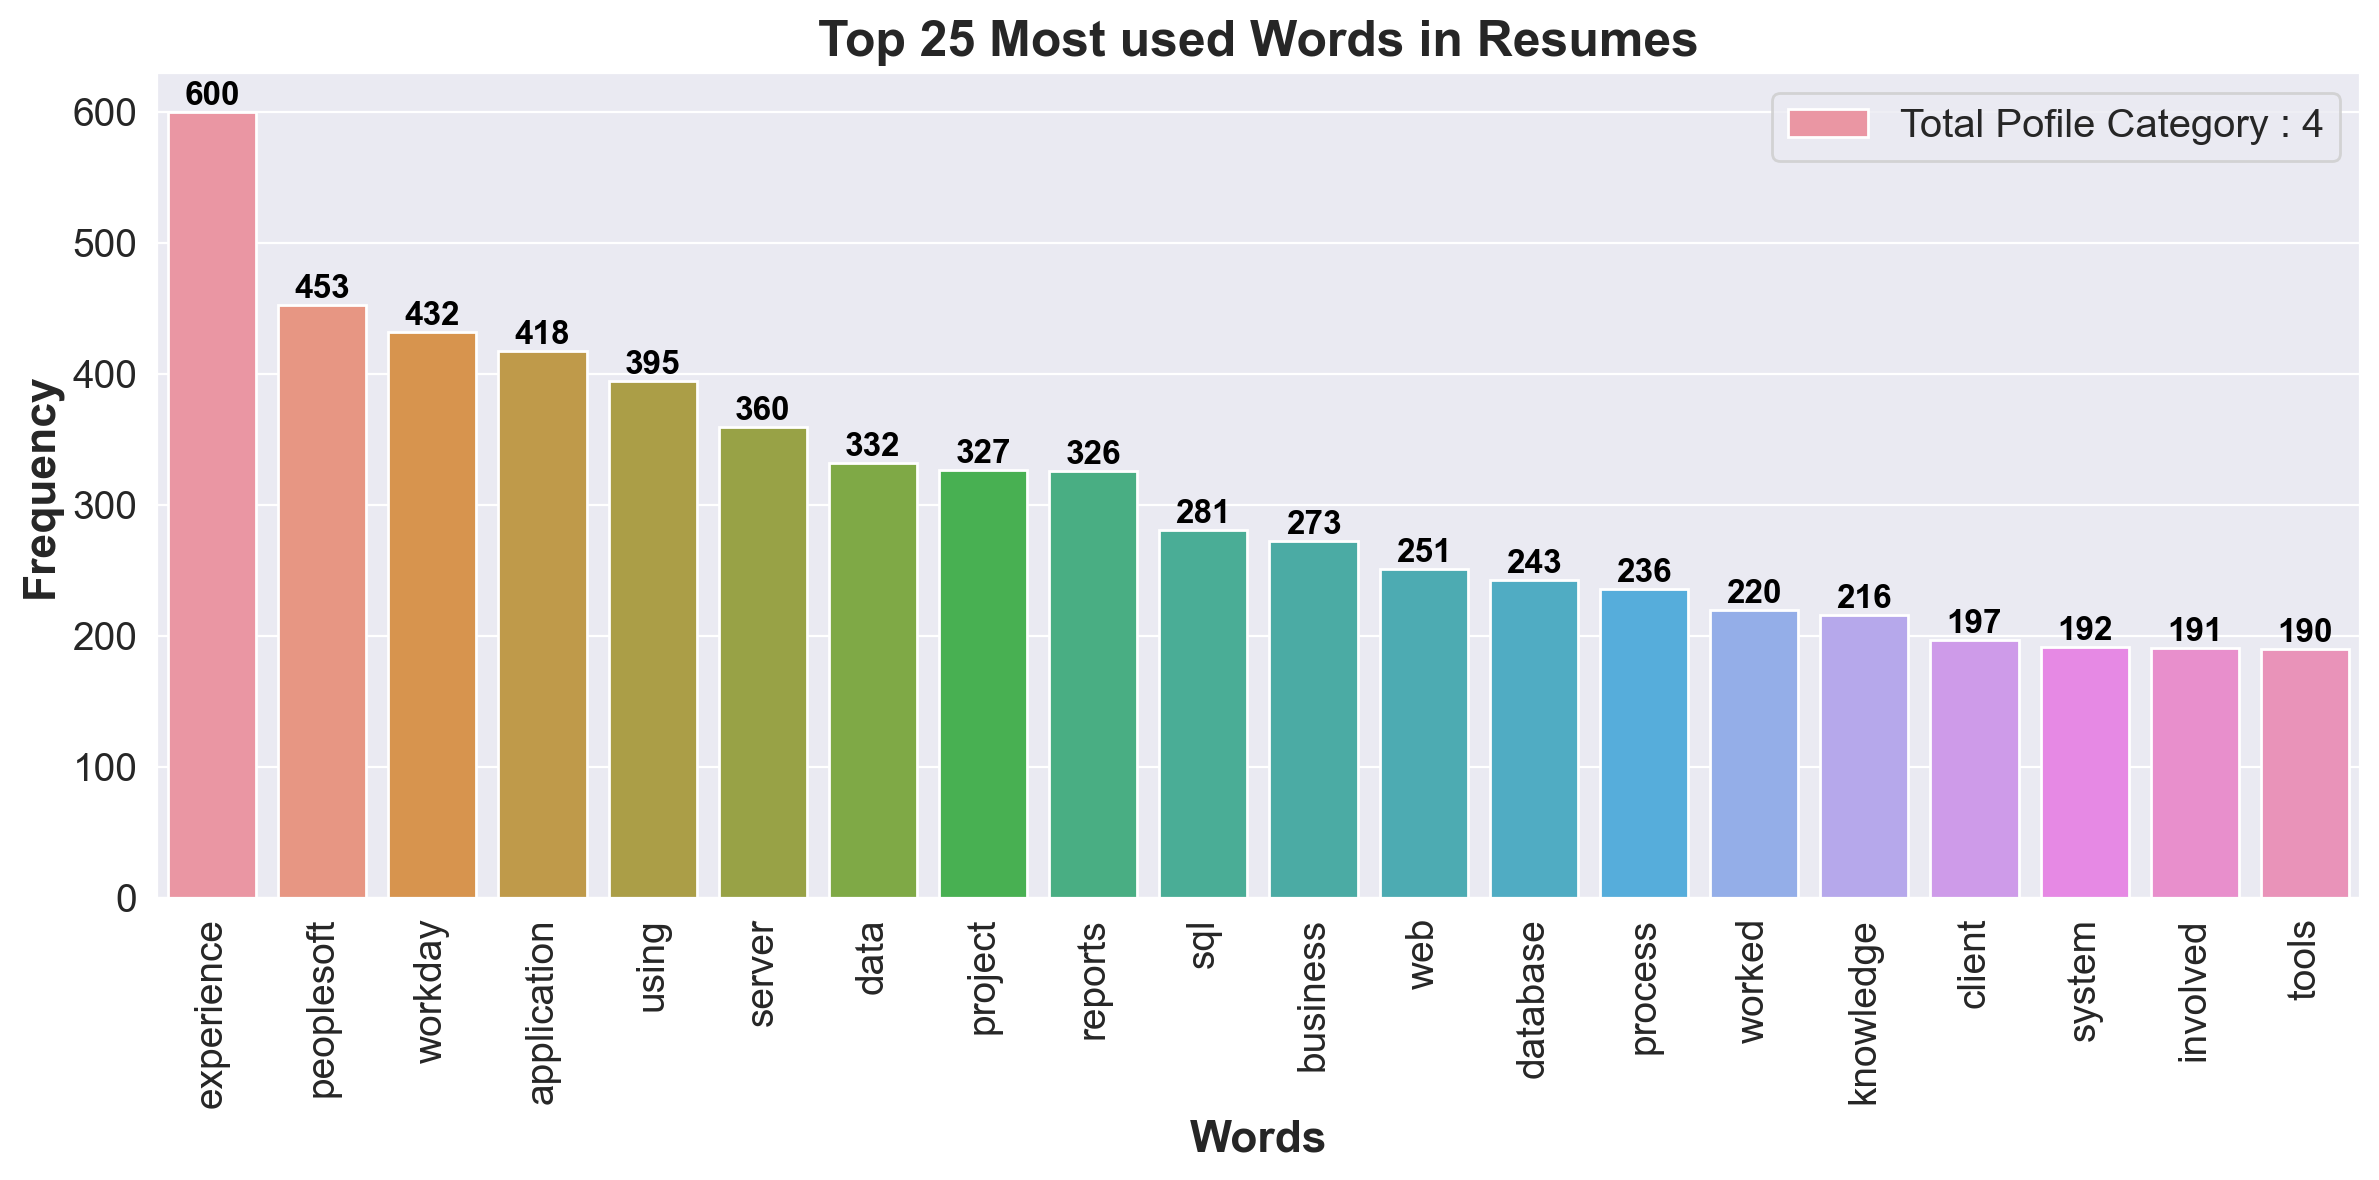

In [25]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(20), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('C:\\Users\\govin\\NLP project/Top_Words_Bar', dpi = 500)

# 5.4 Using the Word Clouds

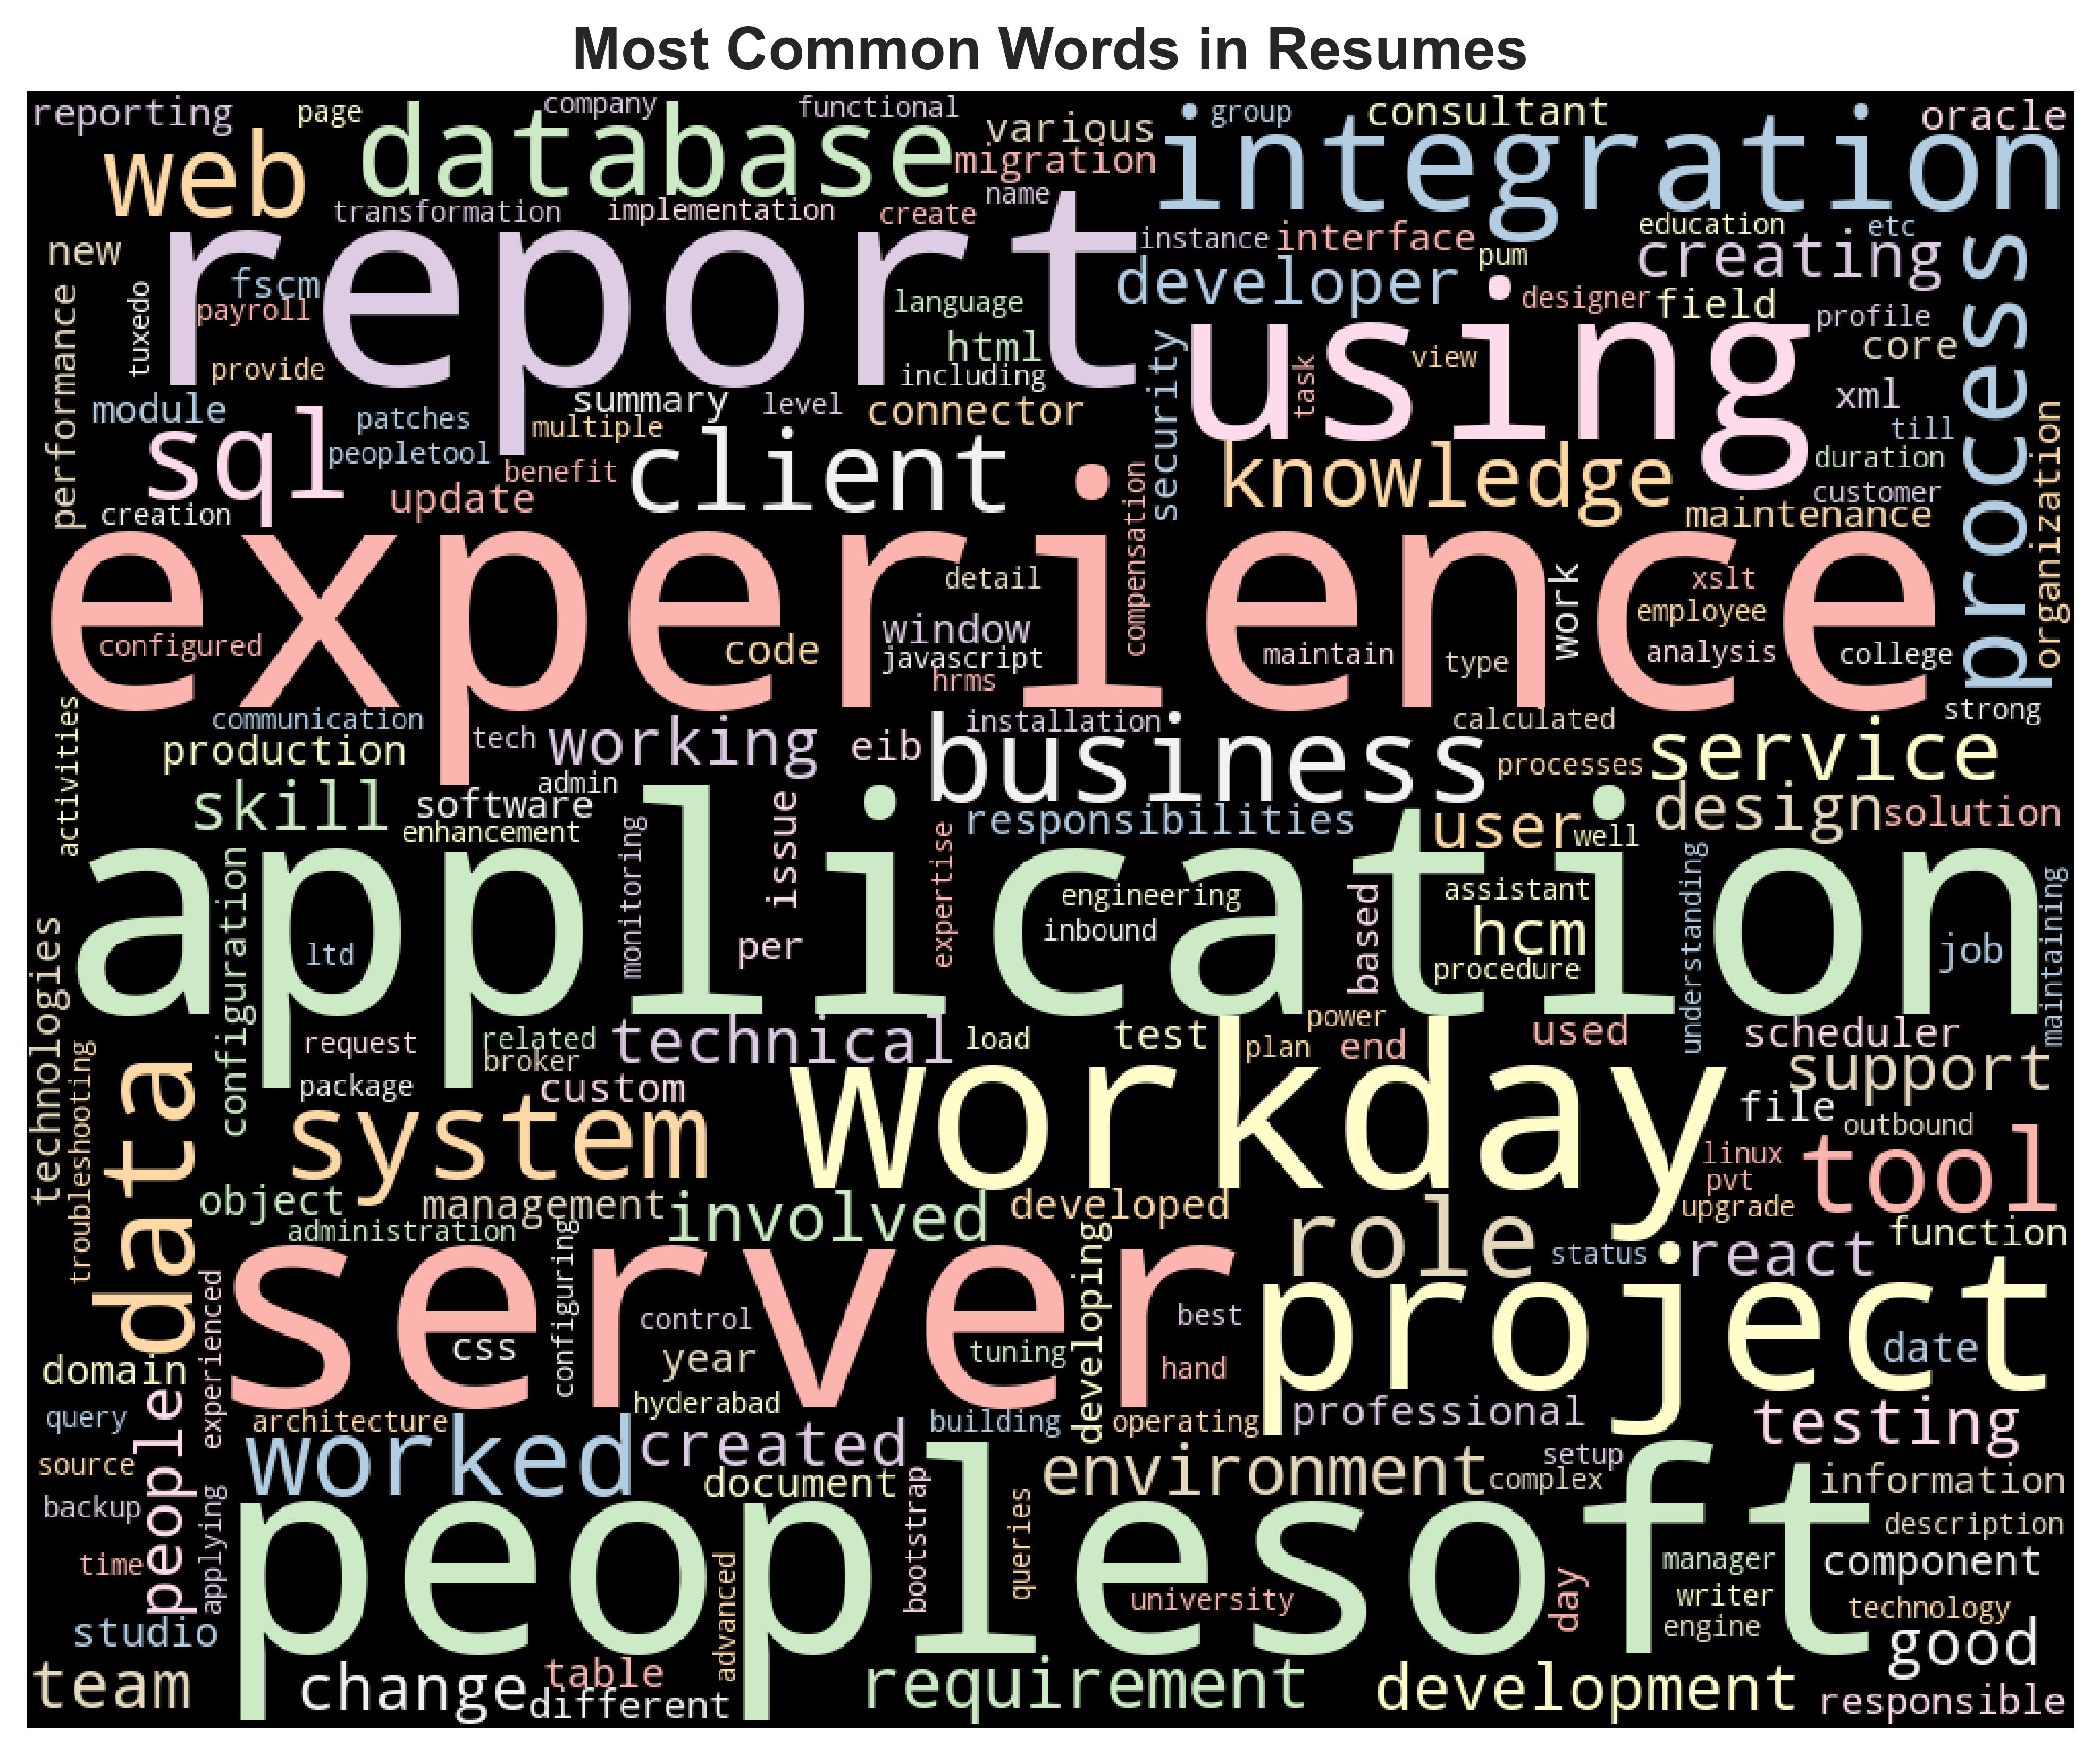

In [26]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('C:\\Users\\govin\\NLP project/Word_Clowds.png')
plt.show()

# THE END !